### Problem Statement

A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurers' management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoking, health conditions and others. Insurance companies apply numerous techniques for analysing and predicting health insurance costs

Data Definition ( metadata)
* age: Age of the policyholder (Numeric)
* sex: Gender of the policyholder (Categoric)
* weight: Weight of the policyholder (Numeric)
* BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
* no_of_dependents: Number of dependent persons on the policyholder (Numeric)
* smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)
* **claim: The amount claimed by the policyholder (Numeric) in dollars**
* blood pressure: Blood pressure reading of policyholder (Numeric)
* diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)
* regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1) (Categoric)
* job_title: Job profile of the policyholder (Categoric)
* city: The city in which the policyholder resides (Categoric) 
* hereditary_diseases: A policyholder suffering from hereditary diseases or not (Categoric)

In [102]:
# Import the Required Libraries...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [103]:
# Import the Dataset

health = pd.read_csv("healthinsurance.csv")

health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


### Exploratory Data Analysis

* Univariate Analysis
* Bivariate Analysis
* Missing Values
* Outlier Identification & Removal - If we dont remove the outliers...our model will be unstable and would be suffering from Heteroskedasticity.
* **Feature Engineering**
* **Statistical Testing** - We will use Hypothesis Testing to find the relations between the Predictors and the target.

* **Categorical Variable Analysis aka Encoding**
* **Scale & Transformation**

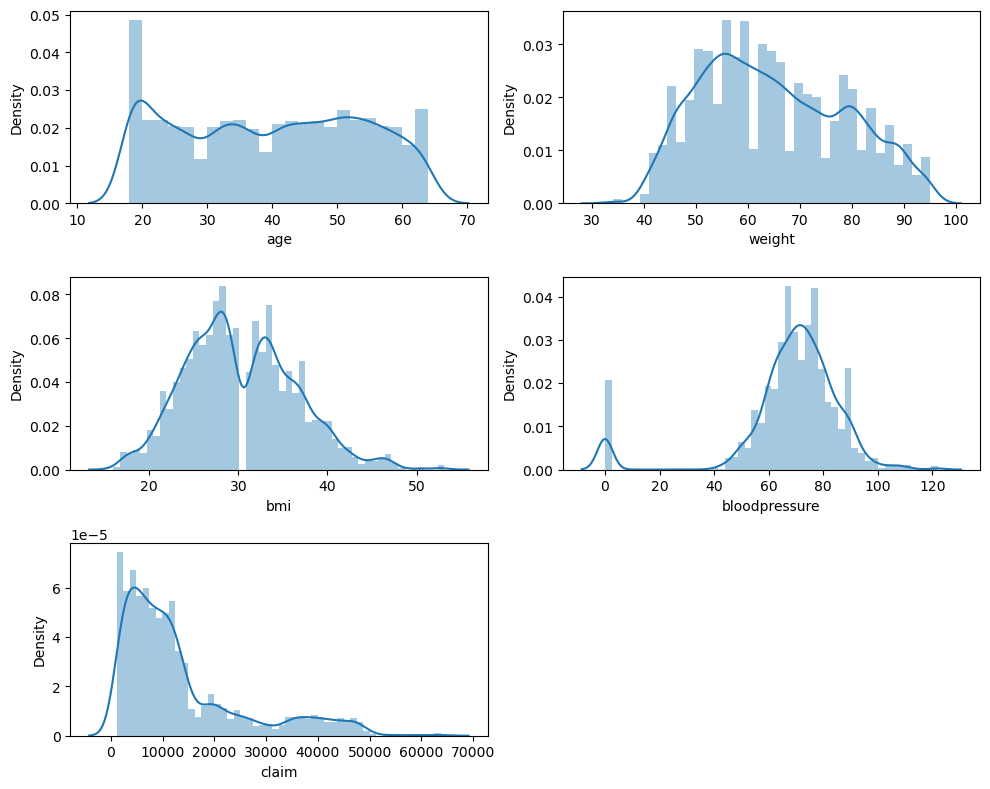

In [104]:
# Univariate Analysis

# Numerical Variables - Distplot.

health.select_dtypes(include = np.number).columns

num_cols = ['age', 'weight', 'bmi', 'bloodpressure', 'claim']

nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize=(10, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(health.loc[:, i])
    iterator+=1
    
plt.tight_layout()
plt.show()

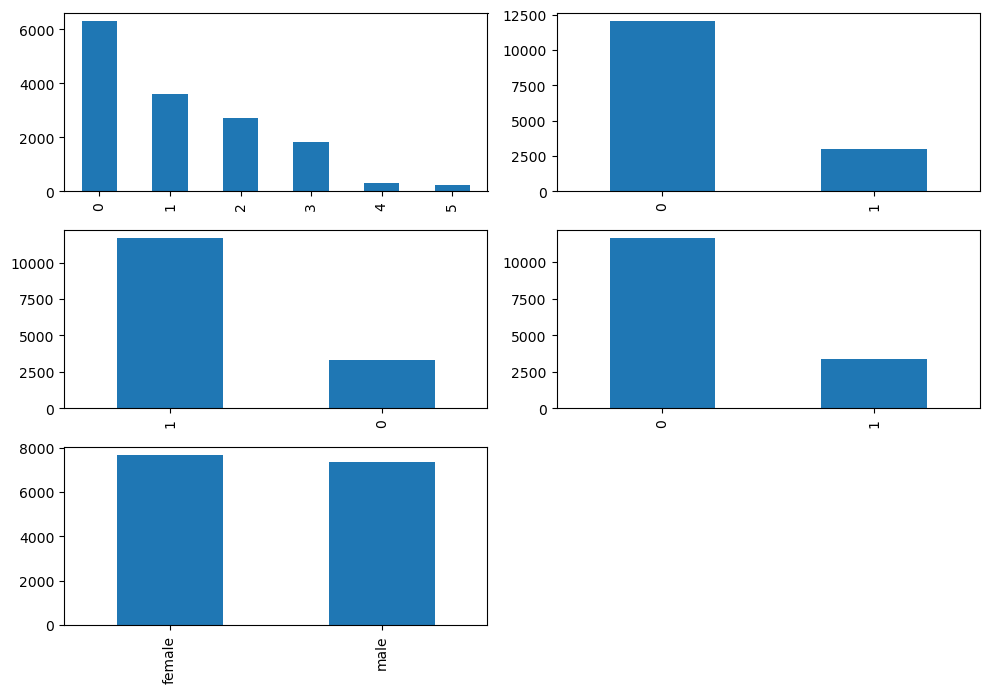

In [105]:
# Lets Analyse the Categories...
#print(health.select_dtypes(include = "object").columns)

cat_cols = ['no_of_dependents', 'smoker', 'diabetes', 'regular_ex', "sex"]


nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (10, 7))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    health.loc[:,i].value_counts().plot(kind="bar") # Frequency Plot
    repeater =repeater+1
    
plt.tight_layout()
plt.show()

#### Inference of Univariate Analysis

**Numerical Vars**
* Age is a variable that is uniformally distributed. It means that the health insurance is sold to any age bracket. Moreover, in US the Health Insurance is mandatory. Thus, we see that people belonging to different age groups hold insurance. There was spike at the age 20 in the plot which means that people resort to health insurance at the early stage of life.

* Weight is a variable that signifies the spread of the age brackets. People of all ages exist in the data and the weight initially shows an increasing patter and then we see that there is a decline which ideally represents the BMI going for toss. When the BMI is more, then people are more inclined towards taking a hit when it comes to critical diseases.

* BMI - We see that there is a increasing & a decreasing trend which gives it the shape of Normality. It signifies that there are healthy as well as unhealthy people. It is a common sense thing that the Cluster of Unhealthy people are the ones who will file a claim almost. 

* BloodPressure: The ideal range of the BP should be 120-80. However we see that there is a spread of the BP with a range of 40 and over 120 as well. This represents that the person is unwell and most likely to approach the Insurance Company for a Claim.

* Claim - It is the target variable and by default it is skewed. It means that there are larger amount of claims that are received by Insurance company. Larger the claims, more critical the case...

**Categorical Vars**

* No of Dependents: No of Dependents in a personal opinion is not only the kids but elderly people at home as well. Here, there should be some relation with the claim amount. Statistically, we will apply Anova/Kruskal Wallis Test to verify if the No of Dependents variable is an important variable for predicting the claim.

* Smoker: The frequency of the Smokers is less in comparison to Non Smokers. This means that there premium will also be less, their claim amount will also be less and at the same time, the frequency of asking the claims will be quite less.

* Diabetes: The frequency of the Diabetic People is more in comparison to Non Diabetics. This means that there premium will also be more, their claim amount will also be more and at the same time, the frequency of asking the claims will be a lot.

* Regular Ex: People as per this data do not engage much when it comes to exercises. 
* Gender: There is no difference when it comes to gender.

### Bivariate Analysis

* Num(Predictor) vs Num(Target Variable) - Scatterplot
* Cat(Predictor) vs Num(Target Variable) - Boxplot/Violinplot
* Cat(P) vs Cat(T): Only applicable in classification and we can make a table using crosstab and then can plot to see the pattern. 

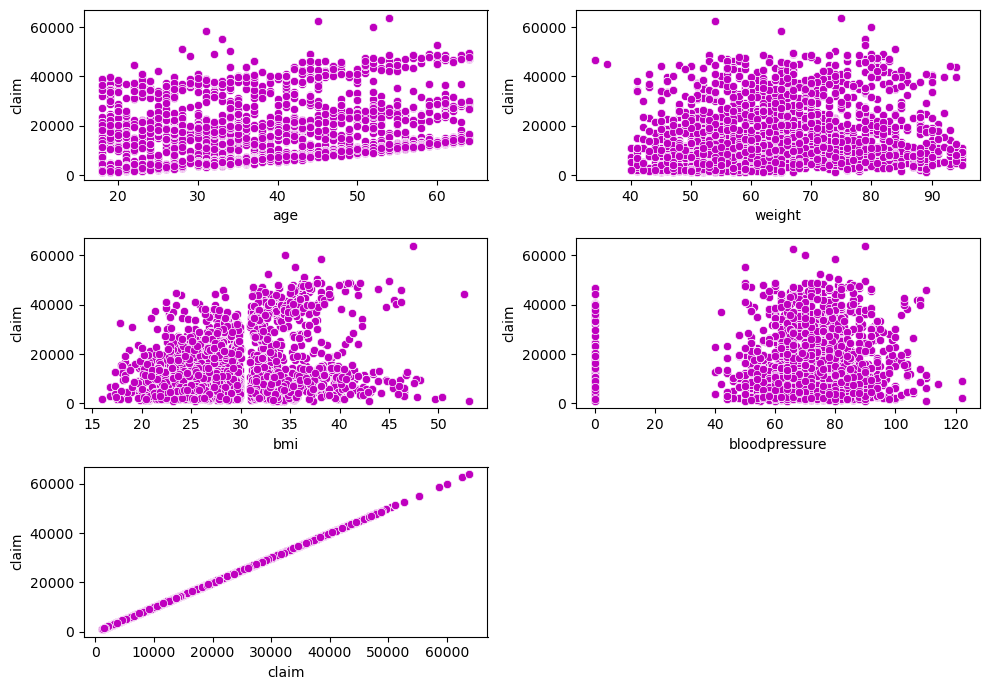

In [106]:
# Num(Predictor) vs Num(Target Variable) - Scatterplot

nrows = 3
ncols = 2
repeat = 1

plt.figure(figsize = (10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, repeat)
    sns.scatterplot(x=health.loc[:, i],y=health.claim, color = "m")
    repeat=repeat+1
    
plt.tight_layout()
plt.show()

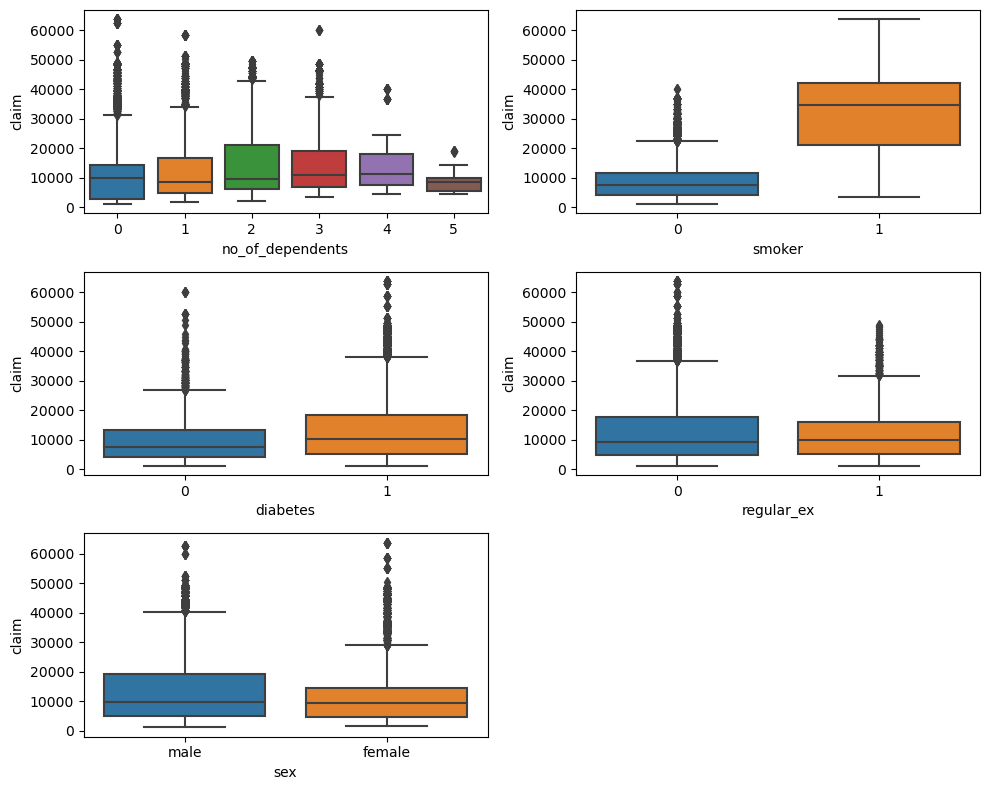

In [107]:
# Cat vs Num

nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize = (10, 8))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(x=health.loc[:, i],y=health.claim)
    iterator+=1
    
plt.tight_layout()
plt.show()

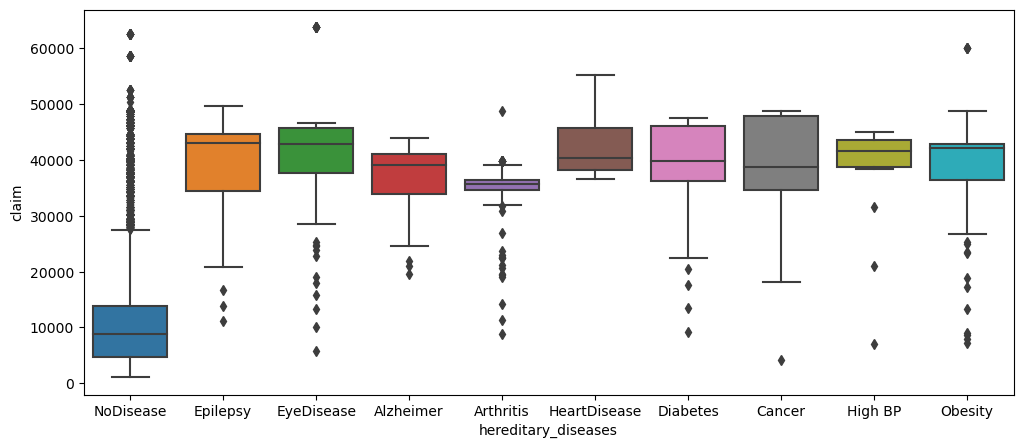

In [108]:
# Plot for Hereditary Diseases..

plt.figure(figsize = (12, 5))

sns.boxplot(x=health.hereditary_diseases,y=health.claim)
plt.show()


In [109]:
# Create a new feature called disease_cat

# Fatal - Heart, Diabetes, Cancer & High BP, Alzheimer
# Non Fatal - Obesity, EyeDisease, Epilepsy, Arthritis
# No Disease

fatal = ['HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Alzheimer']
no = ["NoDisease"]

def fatalities(x):
    if x in fatal:
        return("Fatal")
    elif x in no:
        return("No_Disease")
    else:
        return("Non_Fatal")

<Axes: xlabel='disease_cat', ylabel='claim'>

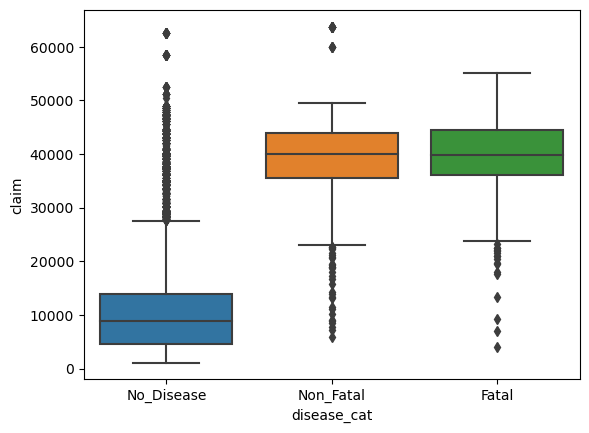

In [110]:
health["disease_cat"] = health.hereditary_diseases.apply(fatalities)

sns.boxplot(x=health.disease_cat,y=health.claim)

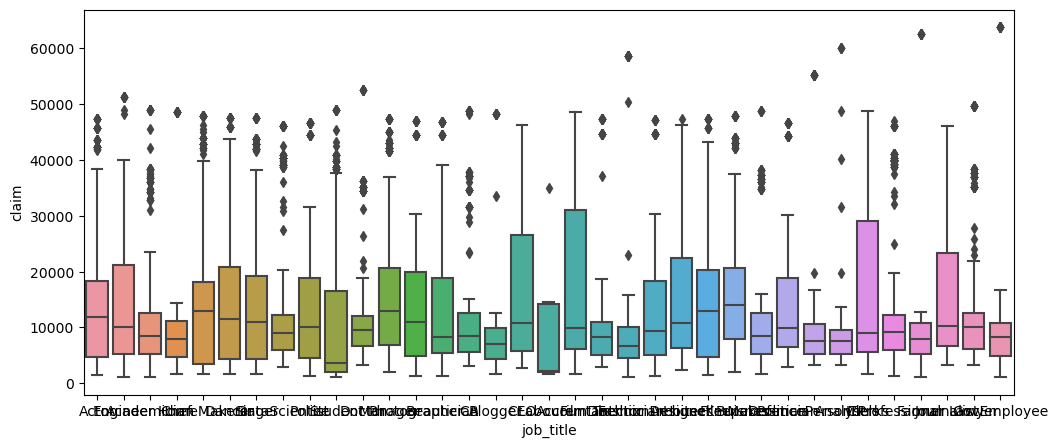

In [111]:
# Job Titles

plt.figure(figsize = (12, 5))
sns.boxplot(x=health.job_title,y=health.claim)
plt.show()

# There are lot of unique job titles and hence lot of noise

In [112]:
# Which Job Title has the highest frequency
# Top 5 Job Titles
health.job_title.value_counts()[:5].index

Index(['Student', 'HomeMakers', 'Singer', 'Actor', 'FilmMaker'], dtype='object')

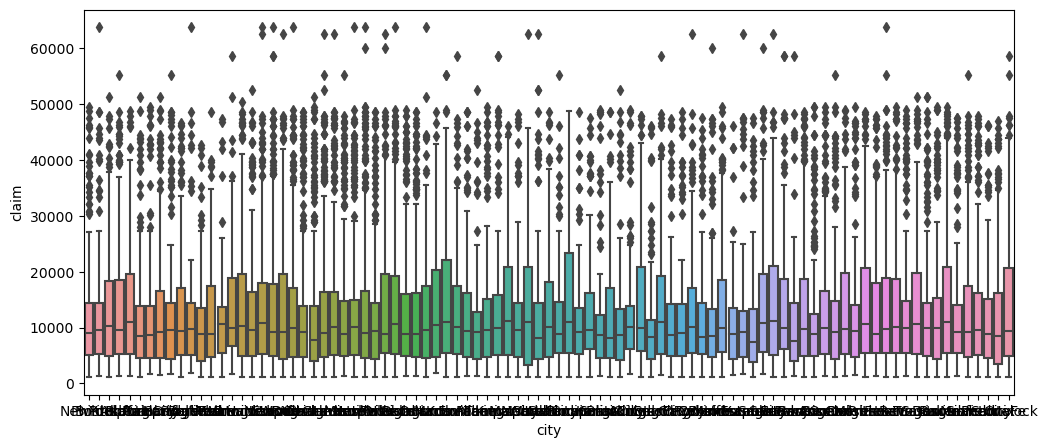

In [113]:
# City

plt.figure(figsize = (12, 5))
sns.boxplot(x=health.city,y=health.claim)
plt.show()

In [114]:
health.city.nunique()

91

### Missing Values

In [115]:
health.isnull().sum()[health.isnull().sum()!=0]

# Note: Bloodpressure also needs treating

age    396
bmi    956
dtype: int64

In [116]:
health.loc[health.bmi.isnull(), ].head() # BMI = Weight/Height**2

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,disease_cat
8,63.0,male,55,NaN,NoDisease,0,0,Hartford,70,1,0,Dancer,13390.6,No_Disease
56,46.0,female,68,NaN,NoDisease,2,0,FallsCity,60,1,0,Dancer,8825.1,No_Disease
60,41.0,male,82,NaN,NoDisease,2,0,Canton,62,1,0,Politician,7256.7,No_Disease
63,45.0,male,60,NaN,NoDisease,2,0,Minneapolis,86,1,0,Actor,8413.5,No_Disease
74,18.0,female,44,NaN,NoDisease,0,0,Oceanside,96,1,0,Photographer,21344.9,No_Disease


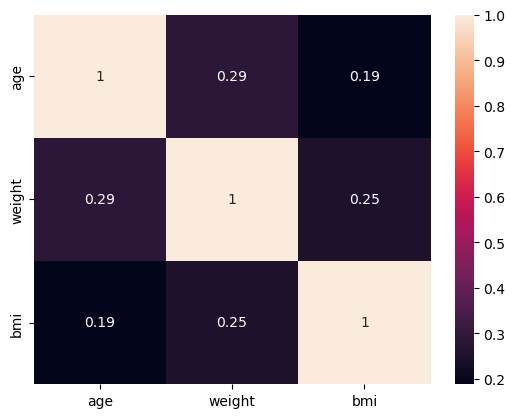

In [117]:
# Age weight and BMI
sns.heatmap(health.loc[:, ["age", "weight", "bmi"]].corr(), annot = True)
plt.show() 

# BMI has 25% Correl with weight & 19% Correl with Age

In [118]:
# Hereditary we have Obese....lets use this to find the pattern

health.loc[health.hereditary_diseases=="Obesity", ['weight', 'bmi', 'age']].corr()

,weight,bmi,age
weight,1.000000,0.693247,0.555598
bmi,0.693247,1.000000,0.565980
age,0.555598,0.565980,1.000000


In [119]:
health.loc[health.hereditary_diseases=="NoDisease", "bmi"].describe() # 

count    13135.000000
mean        30.028344
std          6.039779
min         16.000000
25%         25.600000
50%         29.000000
75%         34.100000
max         53.100000
Name: bmi, dtype: float64

### Missing Value Imputation using Model Building

* Subset of Age, Weight and BMI where are no missing values
* y: BMI and X: Age and Weight
* Build a Model and Predict the Values for BMI...

In [120]:
# Subset of BMI with Age and Weight
localdf = health.loc[:, ["bmi", "age", "weight"]].dropna()

In [121]:
# Lets build a Linear Regression Model
from statsmodels.formula.api import ols

model = ols("bmi~age+weight", data = localdf).fit()
#model.summary()

# Summary: Linear Regression is not a good model to deal with Missing Values
# Because the R Squared is 7.8%

In [122]:
# Build a Non Parametric Model by the name of Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = localdf.loc[:, ["age", "weight"]]
y = localdf.bmi

rf = RandomForestRegressor()
rf.fit(X, y)

#print("R Squared: ", r2_score(y, pred))

RandomForestRegressor()

In [123]:
# Lets pull the Na Dataset
rownums = health.loc[health.bmi.isnull(), ["age", "weight"]].index

# rf.predict(health.loc[i, ["age", "weight"]].values.reshape(1, -1))[0]

for i in rownums:
    input_data = health.loc[i, ["age", "weight"]].values.reshape(1, -1)
    
    # Make the prediction
    predicted_bmi = rf.predict(input_data)
    
    # Update the "bmi" column with the predicted value
    health.loc[i, "bmi"] = predicted_bmi[0]

In [124]:
health.loc[health.age.isnull()]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,disease_cat
76,NaN,female,88,29.6,NoDisease,1,0,Montrose,78,0,0,Singer,3947.4,No_Disease
82,NaN,female,64,24.6,NoDisease,2,0,SanLuis,70,0,1,DataScientist,4529.5,No_Disease
105,NaN,female,73,20.2,NoDisease,2,0,Raleigh,74,0,0,CEO,4906.4,No_Disease
106,NaN,female,71,21.8,NoDisease,1,1,Houston,84,1,0,Singer,16657.7,No_Disease
110,NaN,female,70,34.3,NoDisease,5,0,LosAngeles,82,1,0,Analyst,8596.8,No_Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14769,NaN,female,55,24.2,NoDisease,5,0,Newport,90,1,0,Buisnessman,8965.8,No_Disease
14882,NaN,female,62,25.6,NoDisease,4,0,Miami,70,0,1,Doctor,5708.9,No_Disease
14943,NaN,male,68,27.9,NoDisease,0,0,Fresno,58,0,0,Architect,2867.1,No_Disease
14962,NaN,male,47,29.0,NoDisease,1,0,Atlanta,86,1,0,Academician,4040.6,No_Disease


In [125]:
# Gender wise Age
#health.groupby("hereditary_diseases")["age"].describe().index
#rownums = health.loc[health.age.isnull()].index

In [126]:
# Age Imputation
for i in health.groupby("hereditary_diseases")["age"].describe().index:
    
    health.loc[health.age.isnull(), "age"] = health.loc[health.hereditary_diseases==i, 
                                                        "age"].median()

In [127]:
# BloodPressure
health.bloodpressure.describe() # Lets put avg of 120-80

count    15000.000000
mean        68.650133
std         19.418515
min          0.000000
25%         64.000000
50%         71.000000
75%         80.000000
max        122.000000
Name: bloodpressure, dtype: float64

In [128]:
# Replaced 0s in BP with avg
health.loc[health.bloodpressure==0, "bloodpressure"] = (120+80)/2

### Outlier Analysis

<Axes: >

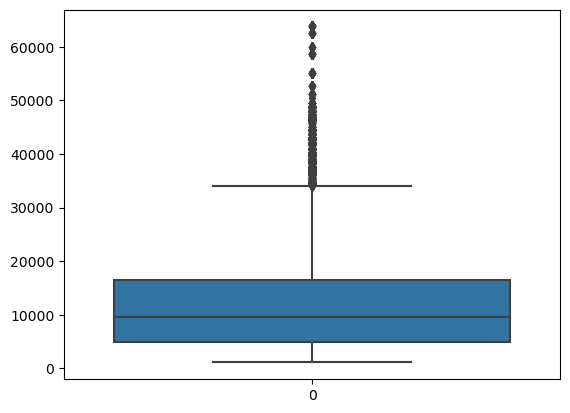

In [129]:
sns.boxplot(health.claim)

In [130]:
# Quartiles
q1 = health.quantile(0.25)
q3 = health.quantile(0.75)
iqr = q3 - q1

upper = q3+1.5*iqr
lower = q1-1.5*iqr

In [131]:
health.loc[~((health<lower) | (health>upper)).any(axis=1)].shape

(6886, 14)

Since more than 50% data is eliminated after Outlier Removal. We cannot afford to loose such a substantial chunk of the Data and hence, we will be including Outliers while building the model

### Feature Engineering

In [132]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,disease_cat
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,No_Disease
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,No_Disease
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Non_Fatal
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,No_Disease
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,No_Disease


In [133]:
health.job_title.unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [134]:
# Target encoding
health["magic1"] = health.groupby("job_title")["claim"].transform("mean")

In [135]:
# Drop the City Variable

# New Interaction feature
health["int_feat"] = np.sqrt(health["weight"]/health.bmi)

In [136]:
# Binning the BP
q1 = health.loc[:, "bloodpressure"].quantile(0.25)
q2 = health.loc[:, "bloodpressure"].quantile(0.50)
q3 = health.loc[:, "bloodpressure"].quantile(0.75)
def bp(x):    
    if x <=q1:
        return("Q1")
    elif x<=q2:
        return("Q2")
    elif x<=q3:
        return("Q3")
    else:
        return("Q4")

In [137]:
health["bp_cat"] = health.bloodpressure.apply(bp)

### Statistical Test

* T Test: Num vs Num (till 2 categories)
* Anova

In [138]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,disease_cat,magic1,int_feat,bp_cat
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,No_Disease,13944.422917,1.622882,Q2
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,No_Disease,14561.052406,1.821698,Q3
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Non_Fatal,13097.379085,1.896182,Q4
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,No_Disease,9464.499288,1.206666,Q2
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,No_Disease,13070.015329,1.557942,Q4


In [142]:
num_cols = ['age', 'weight', 'bmi', 'bloodpressure', "int_feat"]

for i in num_cols:
    print("TTest for ", i, stats.ttest_ind(health.loc[:, i], health.claim))

TTest for  age Ttest_indResult(statistic=-134.71042976353428, pvalue=0.0)
TTest for  weight Ttest_indResult(statistic=-134.45432768576032, pvalue=0.0)
TTest for  bmi Ttest_indResult(statistic=-134.8036897286744, pvalue=0.0)
TTest for  bloodpressure Ttest_indResult(statistic=-134.36581630186637, pvalue=0.0)
TTest for  int_feat Ttest_indResult(statistic=-135.0939448669103, pvalue=0.0)


In [143]:
#health.drop("magic1", axis = 1, inplace = True)

# lets check Smoker, Diabetes and Regular Exercise
for i in ["smoker", "diabetes", "regular_ex"]:
    zero = health.loc[health[i]==0, "claim"]
    one = health.loc[health[i]==1, "claim"]
    print("T Test for ", i, stats.ttest_ind(zero, one))

T Test for  smoker Ttest_indResult(statistic=-149.41206009904465, pvalue=0.0)
T Test for  diabetes Ttest_indResult(statistic=-16.732434028363265, pvalue=2.7904905369577934e-62)
T Test for  regular_ex Ttest_indResult(statistic=7.4218031121223165, pvalue=1.2173630322894587e-13)


In [145]:
# For Sex
zero = health.loc[health.sex=="male", "claim"]
one = health.loc[health.sex=='female', "claim"]
stats.ttest_ind(zero, one) # gender is also important

Ttest_indResult(statistic=7.310964246812036, pvalue=2.7862825389691713e-13)

In [146]:
# Anova

# Ho: Cat is Independent of the target. It means that disease cat has no relation with the claims
# Ho is False
model = ols("claim~job_title", data =health).fit()

from statsmodels.stats.anova import anova_lm
print(anova_lm(model)) # Predictor is Significant.

                df        sum_sq       mean_sq          F        PR(>F)
job_title     34.0  7.616065e+10  2.240019e+09  15.683579  3.223575e-89
Residual   14965.0  2.137388e+12  1.428258e+08        NaN           NaN


In [147]:
import scipy.stats as stats

for i in health.job_title.unique():
    vals = health.loc[health.job_title == i, "claim"]
    print("Normality for", i, "Var: ", stats.shapiro(vals))

Normality for Actor Var:  ShapiroResult(statistic=0.8589107990264893, pvalue=6.983145630512257e-25)
Normality for Engineer Var:  ShapiroResult(statistic=0.8002092838287354, pvalue=3.87587673694582e-21)
Normality for Academician Var:  ShapiroResult(statistic=0.7446460723876953, pvalue=2.0282616042126206e-21)
Normality for Chef Var:  ShapiroResult(statistic=0.5395534634590149, pvalue=1.5663748475072762e-26)
Normality for HomeMakers Var:  ShapiroResult(statistic=0.8687662482261658, pvalue=9.007298941917055e-28)
Normality for Dancer Var:  ShapiroResult(statistic=0.8609684705734253, pvalue=2.853410868380268e-24)
Normality for Singer Var:  ShapiroResult(statistic=0.8420026898384094, pvalue=1.522420812093284e-26)
Normality for DataScientist Var:  ShapiroResult(statistic=0.7108625769615173, pvalue=1.1987015189567386e-23)
Normality for Police Var:  ShapiroResult(statistic=0.8114100694656372, pvalue=1.3462958197572231e-21)
Normality for Student Var:  ShapiroResult(statistic=0.7279645204544067, p

In [148]:
# Kruskal Wallis Test
cat1 = health.loc[health.job_title=="Lawyer", "claim"]
cat2 = health.loc[health.job_title=="Clerks", "claim"]
cat3 = health.loc[health.job_title=="CEO", "claim"]
cat4 = health.loc[health.job_title=="Buisnessman", "claim"]

In [149]:
# Ho: Job Title is Independent of the Claim
# ha: Ho is False
stats.kruskal(cat1, cat2, cat3, cat4) # Job Title is an important variable for Target

KruskalResult(statistic=13.751824676211807, pvalue=0.003263183544107867)

In [150]:
# Drop the Hereditary and City
health.drop(["hereditary_diseases", "city"], axis = 1, inplace =True)

In [151]:
health.job_title.unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [152]:
non_prof = ["Farmer", "Chef", "HomeMakers", "Dancer", "Singer", "Student",
           "Beautician", "Labourer", "HouseKeeper",'FilmDirector', 'FilmMaker']

def professions(x):
    if x in non_prof:
        return("Non_Professional")
    else:
        return("Professional")

In [153]:
health["job_title"] = health.job_title.apply(professions)

In [154]:
# For Job Titles...
zero = health.loc[health.job_title=="Professional", "claim"]
one = health.loc[health.job_title=='Non_Professional', "claim"]
stats.ttest_ind(zero, one) # gender is also important

Ttest_indResult(statistic=6.1666893703065915, pvalue=7.152257594219444e-10)

In [155]:
# Categorical Encoding
dummy = pd.get_dummies(health, drop_first = True)

### Modeling

* Linear Regression Model
* Transformation Models - Log, Sqrt
* Regularization Models
* SGD Regressor
* Gradient Boosting Model

In [156]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold

X = dummy.drop("claim", axis = 1)
y = dummy.claim

# Kfold
kfold = KFold(n_splits = 10, shuffle = True, random_state = 123)

In [157]:
# Linear Regression Model
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    # Predict
    pred_train = lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test = lr.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse))

R Squared:  0.7620763641653306
Training RMSE:  5909.248887000021
Test RMSE:  5918.223346500476


In [158]:
# Log Transform Model
lr = LinearRegression()
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = np.log(y).iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = np.log(y).iloc[test_index]
    # Predict
    pred_train = lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test = lr.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse))

R Squared:  0.7423893556359722
Training RMSE:  0.4597412432137359
Test RMSE:  0.460255413869832


In [159]:
# Ridge
lr = Ridge(alpha = 25)
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    # Predict
    pred_train = lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test = lr.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse))

R Squared:  0.761983099162278
Training RMSE:  5910.898593690754
Test RMSE:  5919.523774299026


<Axes: >

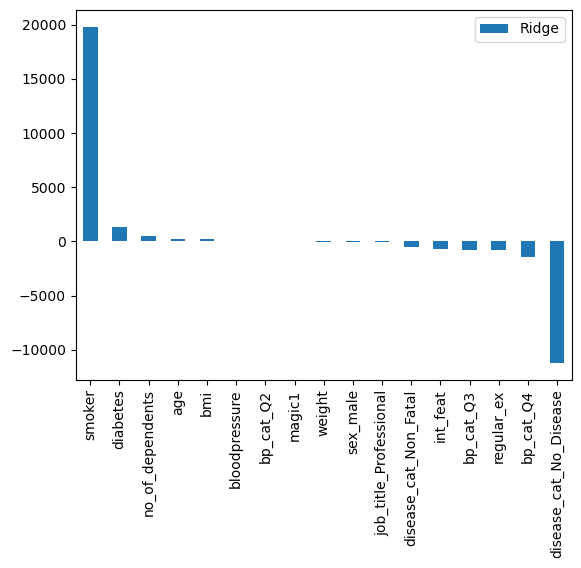

In [160]:
# Feature Plot
pd.DataFrame(lr.coef_, lr.feature_names_in_, columns = ["Ridge"]).\
sort_values(by = "Ridge", ascending = False).plot(kind = "bar")

In [161]:
# lasso
lr = Lasso(alpha = 25)
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    # Predict
    pred_train = lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test = lr.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse))

R Squared:  0.7615996600149746
Training RMSE:  5916.92986081932
Test RMSE:  5924.208802608674


In [162]:
# SGD Regressor

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    # Predict
    pred_train = sgd.fit(xtrain, ytrain).predict(xtrain)
    pred_test = sgd.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse)) # Overfitting Scenario....

R Squared:  -4.0823693106261493e+24
Training RMSE:  1.8787767080345744e+16
Test RMSE:  1.8981202082015764e+16


In [163]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    # Predict
    pred_train = gbm.fit(xtrain, ytrain).predict(xtrain)
    pred_test = gbm.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse)) # Better Predictive Power

R Squared:  0.8665402382418821
Training RMSE:  4309.24999394827
Test RMSE:  4429.452504180012


In [164]:
# Elastic Net
enet = ElasticNet()
r2 = []
train_rmse = []
test_rmse = []

for train_index, test_index in kfold.split(X, y):
    # Data Formation
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = X.iloc[test_index]
    ytest = y.iloc[test_index]
    # Predict
    pred_train = enet.fit(xtrain, ytrain).predict(xtrain)
    pred_test = enet.fit(xtrain, ytrain).predict(xtest)
    # Append & Score Calculation
    r2.append(r2_score(ytest, pred_test))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print("R Squared: ", np.mean(r2))
print("Training RMSE: ", np.mean(train_rmse))
print("Test RMSE: ", np.mean(test_rmse)) # Enet needs Parameter Tuning

R Squared:  0.4268887191786234
Training RMSE:  9189.120650431738
Test RMSE:  9191.393254148643
